In [15]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 2s 0us/step


In [3]:
# We divide each image by the maximum number of pixels(255) so that
# the image range will be between 0 and 1, this will get our model to train faster
X_train = X_train/255.0
X_test = X_test/255.0

In [4]:
# Change to 1 dimensional vector using reshaping
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

In [7]:
# Create the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=128, activation='relu', input_shape=(784,)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=10, activation='softmax')
])

In [20]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [21]:
# Training the model
history = model.fit(X_train, y_train, epochs=10,
                   validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2537 - accuracy: 0.9026 - val_loss: 0.3246 - val_accuracy: 0.8881
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2478 - accuracy: 0.9049 - val_loss: 0.3367 - val_accuracy: 0.8834
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2427 - accuracy: 0.9076 - val_loss: 0.3354 - val_accuracy: 0.8855
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2400 - accuracy: 0.9089 - val_loss: 0.3568 - val_accuracy: 0.8810
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2356 - accuracy: 0.9105 - val_loss: 0.3434 - val_accuracy: 0.8856
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2330 - accuracy: 0.9111 - val_loss: 0.3365 - val_accuracy: 0.8882
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2282 - accuracy: 0.9130 - val_loss: 0.3365 - val_accuracy:

313/313 [==============================] - 1s 2ms/step - loss: 0.3578 - accuracy: 0.8824
Accuracy:  0.8823999762535095


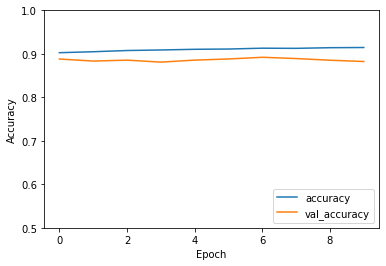

In [23]:
# Evaluating the model
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test, y_test)
print('Accuracy: ', test_acc)